In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
from datetime import date

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Loading the raw data
df = pd.read_csv('S:/Fall/xyz_airline.csv')
df.head()

,PNRLocatorID,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PNRCreateDate,ServiceStartDate,PaxName,EncryptedName,GenderCode,...,BaseFareAmt,TotalDocAmt,UFlyRewardsNumber,UflyMemberStatus,CardHolder,BookedProduct,EnrollDate,MarketingFlightNbr,MarketingAirlineCode,StopoverCode
0,AAABJK,3377365159634,2,JFK,MSP,2013-11-23,2013-12-13,BRUMSA,4252554D4241434B44696420493F7C2067657420746869...,F,...,234.20,0.0,NaN,NaN,NaN,CHEOPQ,NaN,244,SY,O
1,AAABJK,3377365159634,1,MSP,JFK,2013-11-23,2013-12-08,BRUMSA,4252554D4241434B44696420493F7C2067657420746869...,F,...,234.20,0.0,NaN,NaN,NaN,CHEOPQ,NaN,243,SY,NaN
2,AAABMK,3372107381942,2,MSP,SFO,2014-02-04,2014-02-23,EILDRY,45494C4445525344696420493F7C206765742074686973...,M,...,293.96,338.0,NaN,NaN,NaN,NaN,NaN,397,SY,O
3,AAABMK,3372107381942,1,SFO,MSP,2014-02-04,2014-02-20,EILDRY,45494C4445525344696420493F7C206765742074686973...,M,...,293.96,338.0,NaN,NaN,NaN,NaN,NaN,392,SY,NaN
4,AAABTP,3372107470782,1,MCO,MSP,2014-03-13,2014-04-23,SKELMA,534B454C544F4E44696420493F7C206765742074686973...,F,...,112.56,132.0,NaN,NaN,NaN,NaN,NaN,342,SY,NaN


In [ ]:
# Miles.csv is a supporting file generated to capture the average route distance travelled in miles by 
# flights (typically Sun country fleet - Boeing 737-700)
# Sourced from "https://www.airmilescalculator.com/"

df_mile = pd.read_csv('S:/Fall/miles.csv', encoding='unicode_escape', usecols = [0,1,2])

df_mile.head()

,origin,dest,miles
0,JFK,MSP,1028
1,MSP,JFK,1028
2,MSP,SFO,1589
3,SFO,MSP,1589
4,MCO,MSP,1310


# Part - A
# Data Exploration

In [ ]:
print(df.shape)
df.info()

(3435388, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3435388 entries, 0 to 3435387
Data columns (total 26 columns):
 #   Column                Dtype  
---  ------                -----  
 0   PNRLocatorID          object 
 1   TicketNum             int64  
 2   CouponSeqNbr          int64  
 3   ServiceStartCity      object 
 4   ServiceEndCity        object 
 5   PNRCreateDate         object 
 6   ServiceStartDate      object 
 7   PaxName               object 
 8   EncryptedName         object 
 9   GenderCode            object 
 10  birthdateid           float64
 11  Age                   float64
 12  PostalCode            object 
 13  BkdClassOfService     object 
 14  TrvldClassOfService   object 
 15  BookingChannel        object 
 16  BaseFareAmt           float64
 17  TotalDocAmt           float64
 18  UFlyRewardsNumber     float64
 19  UflyMemberStatus      object 
 20  CardHolder            object 
 21  BookedProduct         object 
 22  EnrollDate            object

In [ ]:
df.isna().sum()

PNRLocatorID                  0
TicketNum                     0
CouponSeqNbr                  0
ServiceStartCity              0
ServiceEndCity                0
PNRCreateDate                 0
ServiceStartDate              0
PaxName                       0
EncryptedName                 0
GenderCode                43999
birthdateid               43999
Age                       43999
PostalCode              2744995
BkdClassOfService             0
TrvldClassOfService           0
BookingChannel                0
BaseFareAmt                   0
TotalDocAmt                   0
UFlyRewardsNumber       2740908
UflyMemberStatus        2740908
CardHolder              2740908
BookedProduct           2209904
EnrollDate              2740908
MarketingFlightNbr            0
MarketingAirlineCode          0
StopoverCode            1720454
dtype: int64

<AxesSubplot:>

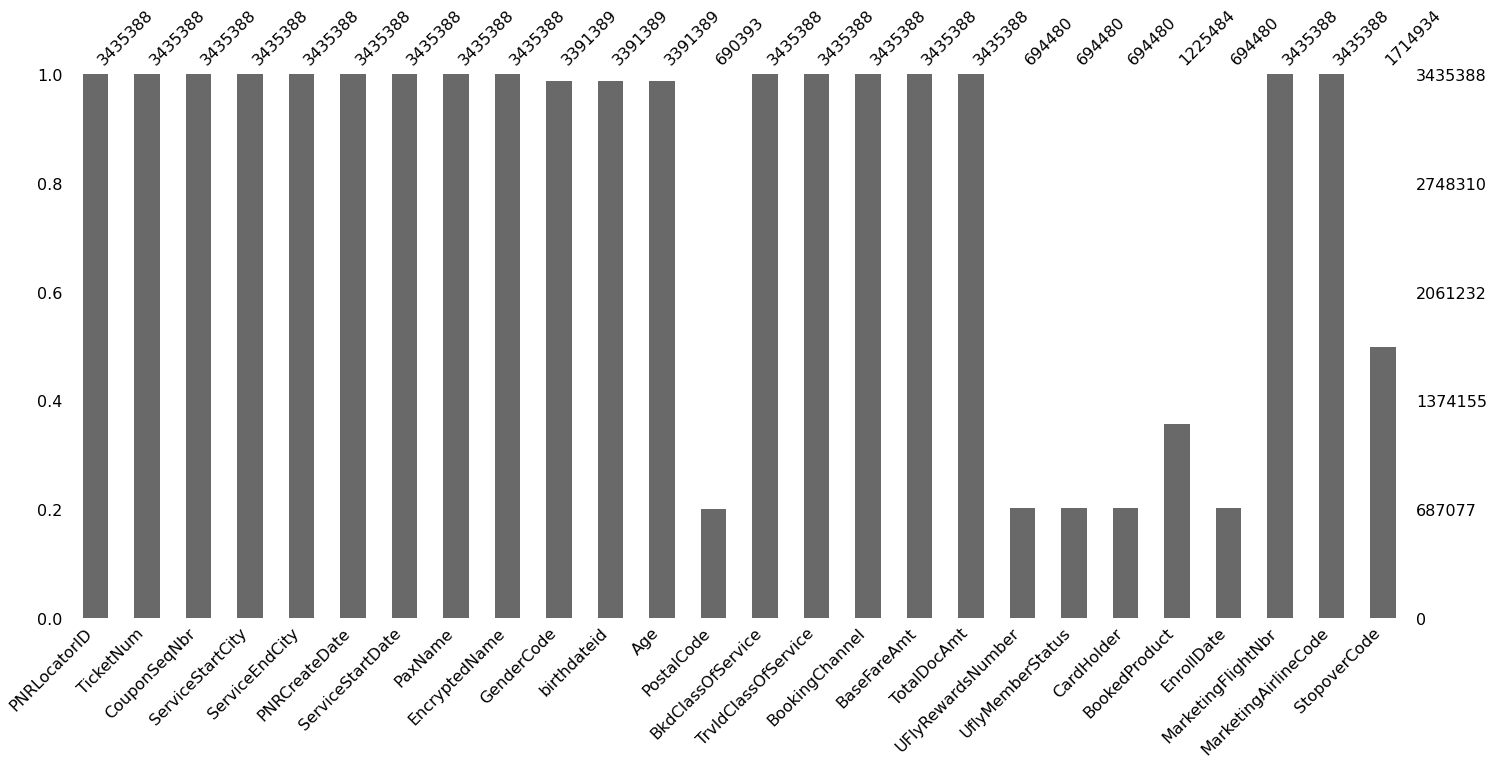

In [ ]:
msno.bar(df)

# Part - B
# Data Cleaning and wrangling

## Objective is to tranform the transaction level raw data into customer profiles 

In [ ]:
# Dropping the columns that are irrelevant or if contain high null values 

drop_cols = ['PostalCode', 'UFlyRewardsNumber','MarketingFlightNbr', 'StopoverCode']
df.drop(drop_cols, axis = 1, inplace = True)

In [ ]:
# Filter only SY flights as we are considering only these records 

df = df.loc[df['MarketingAirlineCode'] == 'SY']
df.shape

(3430350, 22)

In [ ]:
#Converting date columns to datettime
date_cols = ['PNRCreateDate', 'ServiceStartDate', 'EnrollDate']
for date in date_cols:
    df[date] = pd.to_datetime(df[date])

In [ ]:
# Variable indicating how early the customer booked the flight
df['BookTravelDays'] = (df['ServiceStartDate'] - df['PNRCreateDate']) / np.timedelta64(1, 'D')

<AxesSubplot:>

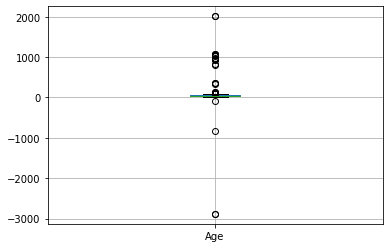

In [ ]:
# Age outliers
df.boxplot(column='Age')

Null Age Values:  45191


<AxesSubplot:>

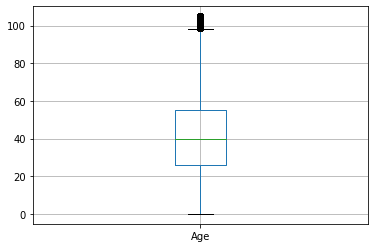

In [ ]:
# Imputing Age with median value
df['Age'] = df['Age'].apply(lambda x: np.nan if (x>105 or x<0) else x)

print("Null Age Values: ", df['Age'].isna().sum())
df['Age'] = df['Age'].fillna(df['Age'].median())
df.boxplot(column='Age')

In [ ]:
# Gender code
df['GenderCode'] = df['GenderCode'].fillna(df['GenderCode'].mode())
df['GenderCode'] = np.where(df['GenderCode'].str.contains('F'), 1, 0)

In [ ]:
# Upgrade flag to indicate if a customer upgraded from Coach to First class
df['Upgrade'] = df.apply(lambda x: 0 if x['BkdClassOfService'] == 'Coach' 
                         and x['TrvldClassOfService'] == 'Coach' else 1, axis=1)

In [ ]:
# suppFare records the ancillary charges paid by customer 
# Assuming that these charges reflect the unplanned and inflight services

df['suppFare'] = df['TotalDocAmt'] - df['BaseFareAmt']
df['suppFare'] = df['suppFare'].apply(lambda x : x if x > 0 else 0)

In [ ]:
# One hot encoding categorical variables
df2 = pd.get_dummies(df, columns = ['BkdClassOfService','TrvldClassOfService', 'UflyMemberStatus'], 
                     prefix=['Bkd', 'Trvld', 'Ufly'])
df2.head()

,PNRLocatorID,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PNRCreateDate,ServiceStartDate,PaxName,EncryptedName,GenderCode,...,Upgrade,suppFare,Bkd_Coach,Bkd_Discount First Class,Bkd_First Class,Trvld_Coach,Trvld_Discount First Class,Trvld_First Class,Ufly_Elite,Ufly_Standard
0,AAABJK,3377365159634,2,JFK,MSP,2013-11-23,2013-12-13,BRUMSA,4252554D4241434B44696420493F7C2067657420746869...,F,...,0,0.00,1,0,0,1,0,0,0,0
1,AAABJK,3377365159634,1,MSP,JFK,2013-11-23,2013-12-08,BRUMSA,4252554D4241434B44696420493F7C2067657420746869...,F,...,1,0.00,1,0,0,0,0,1,0,0
2,AAABMK,3372107381942,2,MSP,SFO,2014-02-04,2014-02-23,EILDRY,45494C4445525344696420493F7C206765742074686973...,M,...,1,44.04,1,0,0,0,1,0,0,0
3,AAABMK,3372107381942,1,SFO,MSP,2014-02-04,2014-02-20,EILDRY,45494C4445525344696420493F7C206765742074686973...,M,...,1,44.04,1,0,0,0,1,0,0,0
4,AAABTP,3372107470782,1,MCO,MSP,2014-03-13,2014-04-23,SKELMA,534B454C544F4E44696420493F7C206765742074686973...,F,...,0,19.44,1,0,0,1,0,0,0,0


In [ ]:
# Calculating the number of days since customer joined the UFly Membership program

df2['MemberSince'] = (df2['EnrollDate'].max() - df2['EnrollDate']) / np.timedelta64(1, 'D')
df2['MemberSince'] = df2['MemberSince'].fillna(0)

In [ ]:
# Removing Duplicates 
print("No of duplicate rows are: ", df2.duplicated().sum())
df2.drop_duplicates(inplace = True)

No of duplicate rows are:  142830


In [ ]:
print(df2.shape)

(3287520, 31)


In [ ]:
# Column to identify if the customer leveraged a discount voucher code on booking 
df2['DiscountFlag'] = df2.apply(lambda x: 0 if x['BookedProduct'] is np.nan else 1, axis=1)
df2['DiscountFlag'].value_counts()

0    2159105
1    1128415
Name: DiscountFlag, dtype: int64

In [ ]:
# Column indicating the channel through which the ticket was booked
df2['Booking_Channel_Flag'] = df2['BookingChannel'].apply(lambda x: 1 if 'SCA' in x else 0)

In [ ]:
# Dropping all other unused columns

cols_drop = ['PNRLocatorID', 'PNRCreateDate', 'ServiceStartDate','BookingChannel', 'BookedProduct',
             'EnrollDate','MarketingAirlineCode', 'CardHolder']

# df3 = df2.drop(cols_drop, axis = 1)
df2.drop(cols_drop, axis = 1, inplace = True)

In [ ]:
# Joining miles data
df_merged = df2.merge(df_mile, how = 'left', left_on = ['ServiceStartCity', 'ServiceEndCity'], right_on = ['origin', 'dest'] )
df_merged.drop(['origin','dest'], axis =1, inplace = True)
df_merged.head()

,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PaxName,EncryptedName,GenderCode,birthdateid,Age,BaseFareAmt,...,Bkd_First Class,Trvld_Coach,Trvld_Discount First Class,Trvld_First Class,Ufly_Elite,Ufly_Standard,MemberSince,DiscountFlag,Booking_Channel_Flag,miles
0,3377365159634,2,JFK,MSP,BRUMSA,4252554D4241434B44696420493F7C2067657420746869...,F,35331.0,66.0,234.20,...,0,1,0,0,0,0,0.0,1,0,1028
1,3377365159634,1,MSP,JFK,BRUMSA,4252554D4241434B44696420493F7C2067657420746869...,F,35331.0,66.0,234.20,...,0,0,0,1,0,0,0.0,1,0,1028
2,3372107381942,2,MSP,SFO,EILDRY,45494C4445525344696420493F7C206765742074686973...,M,46161.0,37.0,293.96,...,0,0,1,0,0,0,0.0,0,1,1589
3,3372107381942,1,SFO,MSP,EILDRY,45494C4445525344696420493F7C206765742074686973...,M,46161.0,37.0,293.96,...,0,0,1,0,0,0,0.0,0,1,1589
4,3372107470782,1,MCO,MSP,SKELMA,534B454C544F4E44696420493F7C206765742074686973...,F,34377.0,69.0,112.56,...,0,1,0,0,0,0,0.0,0,0,1310


In [ ]:
# route_code : Encoding each route with a distinct number

df_merged['route'] = df_merged['ServiceStartCity'].astype(str) + '-' + df_merged['ServiceEndCity'].astype(str)
df_merged['route'] = pd.Categorical(df_merged['route'])
df_merged['route_code'] = df_merged['route'].cat.codes
df_merged.head()

,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PaxName,EncryptedName,GenderCode,birthdateid,Age,BaseFareAmt,...,Trvld_Discount First Class,Trvld_First Class,Ufly_Elite,Ufly_Standard,MemberSince,DiscountFlag,Booking_Channel_Flag,miles,route,route_code
0,3377365159634,2,JFK,MSP,BRUMSA,4252554D4241434B44696420493F7C2067657420746869...,F,35331.0,66.0,234.20,...,0,0,0,0,0.0,1,0,1028,JFK-MSP,51
1,3377365159634,1,MSP,JFK,BRUMSA,4252554D4241434B44696420493F7C2067657420746869...,F,35331.0,66.0,234.20,...,0,1,0,0,0.0,1,0,1028,MSP-JFK,84
2,3372107381942,2,MSP,SFO,EILDRY,45494C4445525344696420493F7C206765742074686973...,M,46161.0,37.0,293.96,...,1,0,0,0,0.0,0,1,1589,MSP-SFO,103
3,3372107381942,1,SFO,MSP,EILDRY,45494C4445525344696420493F7C206765742074686973...,M,46161.0,37.0,293.96,...,1,0,0,0,0.0,0,1,1589,SFO-MSP,129
4,3372107470782,1,MCO,MSP,SKELMA,534B454C544F4E44696420493F7C206765742074686973...,F,34377.0,69.0,112.56,...,0,0,0,0,0.0,0,0,1310,MCO-MSP,69


In [ ]:
# Round trip : Considering the True origin and destination of a ticket, created a column to capture if it is a Round trip ticket

df_end= df_merged.sort_values(['TicketNum', 'CouponSeqNbr'], ascending = False).groupby('TicketNum').head(1)[['ServiceEndCity', 'TicketNum', 'PaxName', 'birthdateid']]
df_start = df_merged.sort_values(['TicketNum', 'CouponSeqNbr'], ascending = True).groupby('TicketNum').head(1)[['ServiceStartCity', 'TicketNum']]

df_se = df_end.merge(df_start, how = 'inner', on= 'TicketNum')
df_se['RoundTrip'] = df_se.apply(lambda x : 0 if x['ServiceEndCity'] == x['ServiceStartCity'] else 1, axis= 1)
df_se.head()

,ServiceEndCity,TicketNum,PaxName,birthdateid,ServiceStartCity,RoundTrip
0,CUN,3379578145804,GOMEXI,55065.0,DFW,1
1,CUN,3379578145803,GOMEJU,42676.0,DFW,1
2,CUN,3379578145802,ESQUMA,42064.0,DFW,1
3,MSP,3379574157873,PYWECO,48921.0,MSP,0
4,MSP,3379574157872,PYWERO,49531.0,MSP,0


In [ ]:
# Aggregating the Round Trip count for each passenger (Passenger unique identifier = PaxName + birthdateid)

df_se.drop(['ServiceEndCity', 'ServiceStartCity', 'TicketNum'], inplace = True, axis = 1)
df_se_final = df_se.groupby(['PaxName', 'birthdateid']).agg({'RoundTrip': 'sum'}).rename(columns = 
                                                                               {'RoundTrip':'RoundTripCount'}).reset_index()
df_se_final.head()

,PaxName,birthdateid,RoundTripCount
0,A ALZI,47687.0,1
1,AABEAL,40549.0,0
2,AABEAN,48964.0,0
3,AABECA,40987.0,1
4,AABECO,44420.0,0


In [ ]:
df_merged=pd.merge(df_merged,df_se_final, on=['PaxName', 'birthdateid'], how='left')

In [ ]:
# Combining discount first class with first class (cosidering both as a single class for this analysis)
df_merged['Trvl_First_Class'] = df_merged['Trvld_First Class'] + df_merged['Trvld_Discount First Class']

In [ ]:
# Dropping the columns that are irrelavent for customer based clustering

df_merged.drop(columns = ['CouponSeqNbr','ServiceStartCity', 'ServiceEndCity', "TotalDocAmt", 'EncryptedName',
                         'Bkd_Coach','Bkd_Discount First Class', 'Bkd_First Class', 'Trvld_Discount First Class', 
                         'DiscountFlag', 'GenderCode' ], inplace = True)

## For customer profiles, the combination of PaxName and birthdateid is considered as a unique customer identifier

In [ ]:
df_merged['birthdateid'].isna().sum()


29495

In [ ]:
# Type casting columns 'miles' & 'birthdateid' (Also, Filtering the records with Null birthdateid)
df_merged['miles'] = df_merged['miles'].astype('float')

df_merged = df_merged[df_merged['birthdateid'].notna()]
df_merged['birthdateid'] = df_merged['birthdateid'].astype('str')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3258025 entries, 0 to 3287519
Data columns (total 19 columns):
 #   Column                Dtype   
---  ------                -----   
 0   TicketNum             int64   
 1   PaxName               object  
 2   birthdateid           object  
 3   Age                   float64 
 4   BaseFareAmt           float64 
 5   BookTravelDays        float64 
 6   Upgrade               int64   
 7   suppFare              float64 
 8   Trvld_Coach           uint8   
 9   Trvld_First Class     uint8   
 10  Ufly_Elite            uint8   
 11  Ufly_Standard         uint8   
 12  MemberSince           float64 
 13  Booking_Channel_Flag  int64   
 14  miles                 float64 
 15  route                 category
 16  route_code            int16   
 17  RoundTripCount        float64 
 18  Trvl_First_Class      uint8   
dtypes: category(1), float64(7), int16(1), int64(3), object(2), uint8(5)
memory usage: 351.1+ MB


In [ ]:
df_grouped = df_merged.groupby(['PaxName', 'birthdateid']).agg({"TicketNum": "count", "BaseFareAmt": "mean", 
                                                   "suppFare":"mean" , "BookTravelDays":"mean",
                                                   "Trvl_First_Class": "sum", "Trvld_Coach":"sum",
                                  'Age':"max", 'Ufly_Elite':"max", 'Ufly_Standard':"max", 
                                                   'MemberSince':"max", "miles":"sum", 'route_code':'nunique',
                                                                'RoundTripCount' : 'mean'}).reset_index()


In [ ]:
df_grouped["RoundTripCount"].fillna(0, inplace = True)
df_grouped.head()

,PaxName,birthdateid,TripCount,AvgBaseFare,AvgSuppFare,BookTravelDays,FCTripCount,CoachTripCount,Age,Ufly_Elite,Ufly_Standard,MemberSince,miles,UniqueRouteCount,RoundTripCount
0,A ALZI,47687.0,1,151.63,22.37,7.0,0,1,33.0,0,0,0.000000,1532.0,1,1.0
1,AABEAL,40549.0,2,0.00,0.00,12.5,0,2,52.0,0,0,0.000000,3434.0,2,0.0
2,AABEAN,48964.0,2,432.56,54.24,10.0,2,0,29.0,0,1,585.385995,3070.0,2,0.0
3,AABECA,40987.0,1,264.19,30.71,0.0,0,1,50.0,0,0,0.000000,1299.0,1,1.0
4,AABECO,44420.0,4,44.65,14.25,24.5,0,4,42.0,0,0,0.000000,4064.0,4,0.0


In [ ]:
df_grouped = df_grouped.rename(columns = { 'TicketNum' : 'TripCount', 'BaseFareAmt' : 'AvgBaseFare', 'suppFare' : 'AvgSuppFare',
                            'Trvl_First_Class' :'FCTripCount', 'Trvld_Coach' : 'CoachTripCount', 
                             'route_code' : 'UniqueRouteCount' })
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343221 entries, 0 to 1343220
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   PaxName           1343221 non-null  object 
 1   birthdateid       1343221 non-null  object 
 2   TripCount         1343221 non-null  int64  
 3   AvgBaseFare       1343221 non-null  float64
 4   AvgSuppFare       1343221 non-null  float64
 5   BookTravelDays    1343221 non-null  float64
 6   FCTripCount       1343221 non-null  uint8  
 7   CoachTripCount    1343221 non-null  uint8  
 8   Age               1343221 non-null  float64
 9   Ufly_Elite        1343221 non-null  uint8  
 10  Ufly_Standard     1343221 non-null  uint8  
 11  MemberSince       1343221 non-null  float64
 12  miles             1343221 non-null  float64
 13  UniqueRouteCount  1343221 non-null  int64  
 14  RoundTripCount    1343221 non-null  float64
dtypes: float64(7), int64(2), object(2), uint8(4)
memo

In [ ]:
numeric_cols = ['TripCount', 'AvgBaseFare','AvgSuppFare', 'BookTravelDays', 'FCTripCount','CoachTripCount',
                'Age', 'MemberSince', 'miles','UniqueRouteCount']

In [ ]:
len(df_grouped)

1343221

# Part - C
# Clustering Analysis on 1.34 Million customer profiles

### Each record in the transformed and aggregated data (df_grouped) uniquely represents a customer 

### (Performing both K-Means and GMM clustering as customer profile consists of only numerical data columns)


In [ ]:
from sklearn.cluster import KMeans
from random import sample, seed
from sklearn.preprocessing import StandardScaler

## 1. K-Means

In [ ]:
scaler = StandardScaler()
df_scale = df_grouped.copy()
df_scale[numeric_cols] = scaler.fit_transform(df_grouped[numeric_cols])

In [ ]:
# To identify the optimal clusters for this dataset, we are downsampling 10% of data 

df_sample = df_grouped.sample(100000)
df_sample_scale = df_sample.copy()
df_sample_scale[numeric_cols] = scaler.fit_transform(df_sample[numeric_cols])

In [ ]:
distortions = []

K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_sample_scale.iloc[:,2:14])
  
    distortions.append(kmeanModel.inertia_)


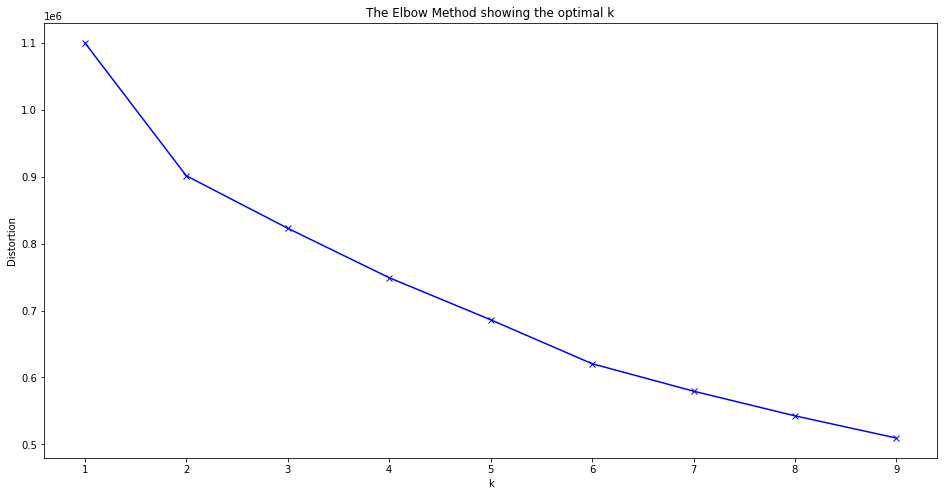

In [ ]:
# Using SSE Elbow curve to identify the optimal number of clusters

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state = 1)
preds = kmeans.fit_predict(df_scale.iloc[:,2:14])

df_grouped['cluster'] = preds
df_grouped['cluster'].value_counts()

3    730508
1    399869
0    198753
2     14091
Name: cluster, dtype: int64

In [ ]:
df_grouped.groupby('cluster').mean()

,TripCount,AvgBaseFare,AvgSuppFare,BookTravelDays,FCTripCount,CoachTripCount,Age,Ufly_Elite,Ufly_Standard,MemberSince,miles,UniqueRouteCount,RoundTripCount
cluster,,,,,,,,,,,,,
0,4.760582,294.896010,45.872583,58.357523,0.291291,4.469291,42.808934,0.000418,0.406600,539.581454,6195.392070,3.497507,0.645037
1,2.070030,408.928778,59.196775,99.520312,0.187539,1.882492,38.643408,0.000275,0.158254,195.471854,2967.158352,1.972874,0.149837
2,13.433255,331.681466,46.072019,54.137995,4.212760,9.220495,50.059896,0.031651,0.842240,1426.493463,17066.304521,5.012064,3.055071
3,1.772487,190.186372,30.052527,34.655203,0.076407,1.696080,38.125132,0.000141,0.086473,87.436556,2183.430932,1.714141,0.531384


In [ ]:
df_km = df_grouped.copy()

In [ ]:
df_grouped.to_csv('S:/Fall/Final_Clusters.csv')

##  2. Gaussian Mixture model (GMM) clustering

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_normalized = MinMaxScaler().fit(df_grouped[numeric_cols]).transform(df_grouped[numeric_cols])

## Exercise: use GaussianMixture (cluster number = 3) to train and assign cluster with the highest probability

cls = GaussianMixture(n_components = 4)
cls_assignment = cls.fit_predict(df_normalized)
# cls_assignment.

In [ ]:
df_grouped['cluster'] = cls_assignment
df_grouped['cluster'].value_counts()

3    902075
0    211467
2    126621
1    103058
Name: cluster, dtype: int64

In [ ]:
df_grouped.groupby('cluster').mean()

,TripCount,AvgBaseFare,AvgSuppFare,BookTravelDays,FCTripCount,CoachTripCount,Age,Ufly_Elite,Ufly_Standard,MemberSince,miles,UniqueRouteCount
cluster,,,,,,,,,,,,
0,3.496503,310.368528,45.538025,53.140549,0.483659,3.012844,41.359380,0.000000,0.000000,0.000000,4484.753801,2.776703
1,5.907149,315.278540,44.944147,61.330247,1.414553,4.492596,46.959101,0.006249,0.906121,1205.292871,7498.033214,3.006521
2,2.307485,276.313646,43.220936,70.965362,0.000008,2.307477,41.233295,0.000774,0.993090,1146.453984,3125.428547,2.307461
3,1.793282,257.876574,39.527489,56.457425,0.000004,1.793278,37.369572,0.000000,0.000002,0.000186,2368.392690,1.793254


In [ ]:
# Creating a copy of K-means cluster results
df_km = df_grouped.copy()
len(df_km)

1343221

### After feature level comparison of each cluster between K-means and GMM models, it is clear that K-means clusters are interpretable and distinct. (GMM clusters have least varied features among several features such as TripCount, AvgSuppFare etc)

### K-Means clusters serve the primary purpose of drawing critical insights and thereby build recommendations, that are actionable by Sun Country airlines.

# Part - D
# Cluster Interpretation

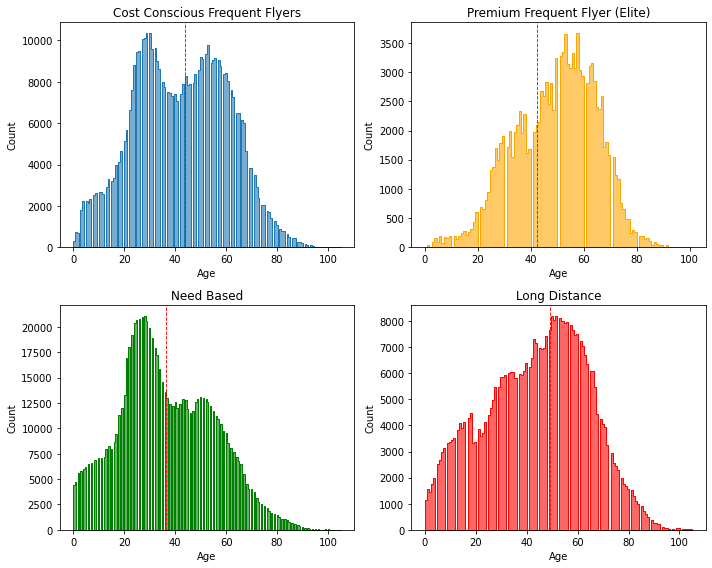

In [ ]:
sns.color_palette("mako", as_cmap=True)
fig, ax = plt.subplots(2,2, figsize = (10,8))
sns.histplot(data = df_km[df_km['cluster']==3], x='Age', ax = ax[0,0], palette="Pastel1", element = 'step', alpha = 0.6 )
sns.histplot(data = df_km[df_km['cluster']==2], x='Age', ax = ax[0,1], palette = 'Pastel1', color = 'orange', element = 'step', alpha = 0.6 )
sns.histplot(data = df_km[df_km['cluster']==0], x='Age', ax = ax[1,0], palette = 'Pastel1', color = 'green', element = 'step', alpha = 0.6)
sns.histplot(data = df_km[df_km['cluster']==1], x='Age', ax = ax[1,1], palette = 'Pastel1', color = 'red', element = 'step', alpha = 0.6)
ax[0,0].set_title('Cost Conscious Frequent Flyers')
ax[0,1].set_title('Premium Frequent Flyer (Elite)')
ax[1,0].set_title('Need Based')
ax[1,1].set_title('Long Distance')

ax[0,0].axvline(x=df_km[df_km['cluster']==1]['Age'].mean(), linewidth=0.9, color='r', linestyle = '--')
ax[0,1].axvline(x=df_km[df_km['cluster']==3]['Age'].mean(), linewidth=0.9, color='r', linestyle = '--')
ax[1,0].axvline(x=df_km[df_km['cluster']==0]['Age'].mean(), linewidth=0.9, color='r', linestyle = '--')
ax[1,1].axvline(x=df_km[df_km['cluster']==2]['Age'].mean(), linewidth=0.9, color='r', linestyle = '--')
plt.tight_layout()

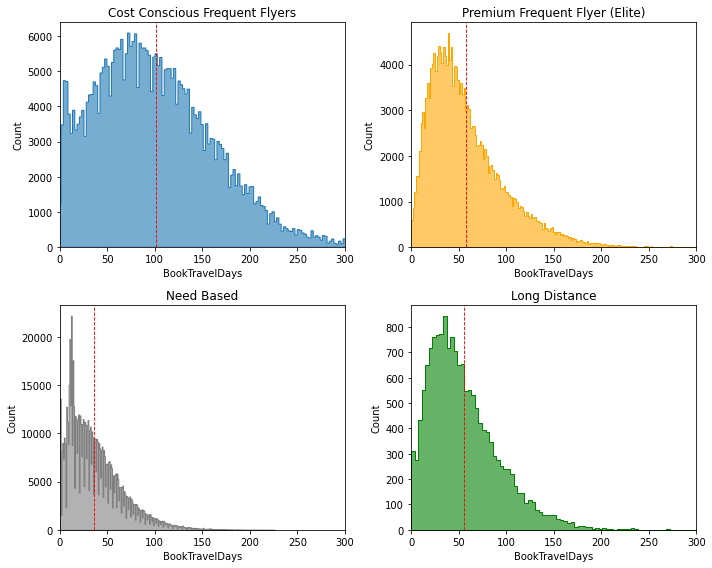

In [ ]:
sns.color_palette("mako", as_cmap=True)
fig, ax = plt.subplots(2,2, figsize = (10,8))
sns.histplot(data = df_km[df_km['cluster']==1], x='BookTravelDays', ax = ax[0,0], palette="Pastel1", element = 'step', alpha = 0.6 )
sns.histplot(data = df_km[df_km['cluster']==3], x='BookTravelDays', ax = ax[0,1], palette = 'Pastel1', color = 'orange', element = 'step', alpha = 0.6 )
sns.histplot(data = df_km[df_km['cluster']==0], x='BookTravelDays', ax = ax[1,0], palette = 'Pastel1', color = 'grey', element = 'step', alpha = 0.6)
sns.histplot(data = df_km[df_km['cluster']==2], x='BookTravelDays', ax = ax[1,1], palette = 'Pastel1', color = 'green', element = 'step', alpha = 0.6)
ax[0,0].set_title('Cost Conscious Frequent Flyers')
ax[0,1].set_title('Premium Frequent Flyer (Elite)')
ax[1,0].set_title('Need Based')
ax[1,1].set_title('Long Distance')


ax[0,0].set_xlim(0,300)
ax[0,1].set_xlim(0,300)
ax[1,0].set_xlim(0,300)
ax[1,1].set_xlim(0,300)

ax[0,0].axvline(x=df_km[df_km['cluster']==1]['BookTravelDays'].mean(), linewidth=0.9, color='r', linestyle = '--')
ax[0,1].axvline(x=df_km[df_km['cluster']==3]['BookTravelDays'].mean(), linewidth=0.9, color='r', linestyle = '--')
ax[1,0].axvline(x=df_km[df_km['cluster']==0]['BookTravelDays'].mean(), linewidth=0.9, color='r', linestyle = '--')
ax[1,1].axvline(x=df_km[df_km['cluster']==2]['BookTravelDays'].mean(), linewidth=0.9, color='r', linestyle = '--')

plt.tight_layout()

In [ ]:
df_agg = df_km.groupby('cluster').mean()
df_agg

,TripCount,AvgBaseFare,AvgSuppFare,BookTravelDays,FCTripCount,CoachTripCount,Age,Ufly_Elite,Ufly_Standard,MemberSince,miles,UniqueRouteCount,RoundTripCount
cluster,,,,,,,,,,,,,
0,4.760582,294.896010,45.872583,58.357523,0.291291,4.469291,42.808934,0.000418,0.406600,539.581454,6195.392070,3.497507,0.645037
1,2.070030,408.928778,59.196775,99.520312,0.187539,1.882492,38.643408,0.000275,0.158254,195.471854,2967.158352,1.972874,0.149837
2,13.433255,331.681466,46.072019,54.137995,4.212760,9.220495,50.059896,0.031651,0.842240,1426.493463,17066.304521,5.012064,3.055071
3,1.772487,190.186372,30.052527,34.655203,0.076407,1.696080,38.125132,0.000141,0.086473,87.436556,2183.430932,1.714141,0.531384


In [ ]:
# Cluster 1 is identified as long distance flights
df_agg['AvgTripDistance'] = df_agg.apply(lambda row : row['miles']/row['TripCount'], axis = 1)
df_agg['AvgTripDistance'] 

cluster
0    1301.393773
1    1433.388757
2    1270.451888
3    1231.845886
Name: AvgTripDistance, dtype: float64

### For Cluster 1 - Identifying the possible destinations from MSP such as San Fransico, Cancun, Anchorage, Palm Springs etc... presenting a pattern of Sunny vacation destinations

In [ ]:
# For Cluster 1 - Identifying the possible destinations from MSP such San Fransico, Cancun, Anchorage, )
df_mile[(df_mile['miles'].astype(int)>1400) & (df_mile.origin == 'MSP')]

,origin,dest,miles
2,MSP,SFO,1589
21,MSP,CUN,1683
23,MSP,RSW,1416
25,MSP,ANC,2518
31,MSP,SXM,2537
32,MSP,LAX,1535
33,MSP,CZM,1717
35,MSP,PSP,1454
37,MSP,MIA,1501
40,MSP,PUJ,2311
